# Wafer fault Prediction
Brief: In electronics, a wafer (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer.

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.



# 
Problem Statement
Data: Wafers data

Problem Statement: Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

Solution: Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [1]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## load the feature store dataset as dataframe
df=pd.read_csv('wafer_23012020_041211.csv')
print('shape of the datafreme is : ' ,df.shape)

shape of the datafreme is :  (100, 592)


In [3]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
df.isnull().sum()

Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [7]:
## test csv file
df.drop(['Unnamed: 0', 'Good/Bad'],axis=1).iloc[:100].to_csv('test.csv')

In [8]:
## replace Unnamed:0  to  wafer
df.rename(columns={"Unnamed: 0": "Wafer"}, inplace= True)

In [9]:
## train test split
from sklearn.model_selection import train_test_split

df ,df_test=train_test_split(df,test_size=0.25,random_state=40)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 68 to 70
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 347.5+ KB


In [11]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,74.00000,75.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,75.000000,75.000000,...,21.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000
mean,3017.88973,2486.528000,2202.230876,1511.542246,1.195776,100.0,96.969374,0.122203,1.462000,0.000267,...,69.362710,0.499171,0.013664,0.003587,2.738840,0.023421,0.014820,0.004615,76.142936,-0.84000
std,74.09659,64.086515,33.960636,478.509393,0.344162,0.0,5.902116,0.002221,0.074882,0.010805,...,30.109408,0.003552,0.004757,0.000963,0.960433,0.011951,0.007463,0.002462,51.800704,0.54624
min,2825.67000,2286.090000,2114.666700,988.207100,0.758800,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.00000
25%,2972.78000,2447.940000,2189.355600,1111.543600,0.866200,100.0,90.859450,0.120800,1.406150,-0.007050,...,47.213600,0.496800,0.011250,0.003000,2.256050,0.013400,0.009500,0.002800,33.787600,-1.00000
50%,3003.90000,2489.150000,2200.988900,1308.647900,1.159450,100.0,99.402750,0.122050,1.453200,0.002100,...,65.218600,0.499300,0.012700,0.003400,2.537900,0.021800,0.013900,0.003800,65.036500,-1.00000
75%,3071.78500,2527.470000,2213.222250,2018.755350,1.383000,100.0,101.471400,0.124275,1.507750,0.007850,...,101.387600,0.501450,0.014550,0.003850,2.937600,0.028000,0.019000,0.005900,104.303400,-1.00000
max,3221.21000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,114.287800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.00000


# Insight:
From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [14]:
## looking at cats in our Target feature

df['Good/Bad'].value_counts()

Good/Bad
-1    69
 1     6
Name: count, dtype: int64

# Insight:
Havily imbalance data

# Analyze Missing Data:
Firstly, we'll check the missing data in the target feature and drop those records. As if we already know a value of target feature then there's no need for a ML algorithm, damn right? Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [16]:
df['Good/Bad'].isna().sum()

0

In [17]:
df.isna().sum().sum()

1782

In [19]:
## check missing values in dependen feature variables

df.isna().sum().sum()/(df.shape[0] * (df.shape[1]-1))

0.04020304568527919

=> 40 out of total cells we having missing value

## visualization

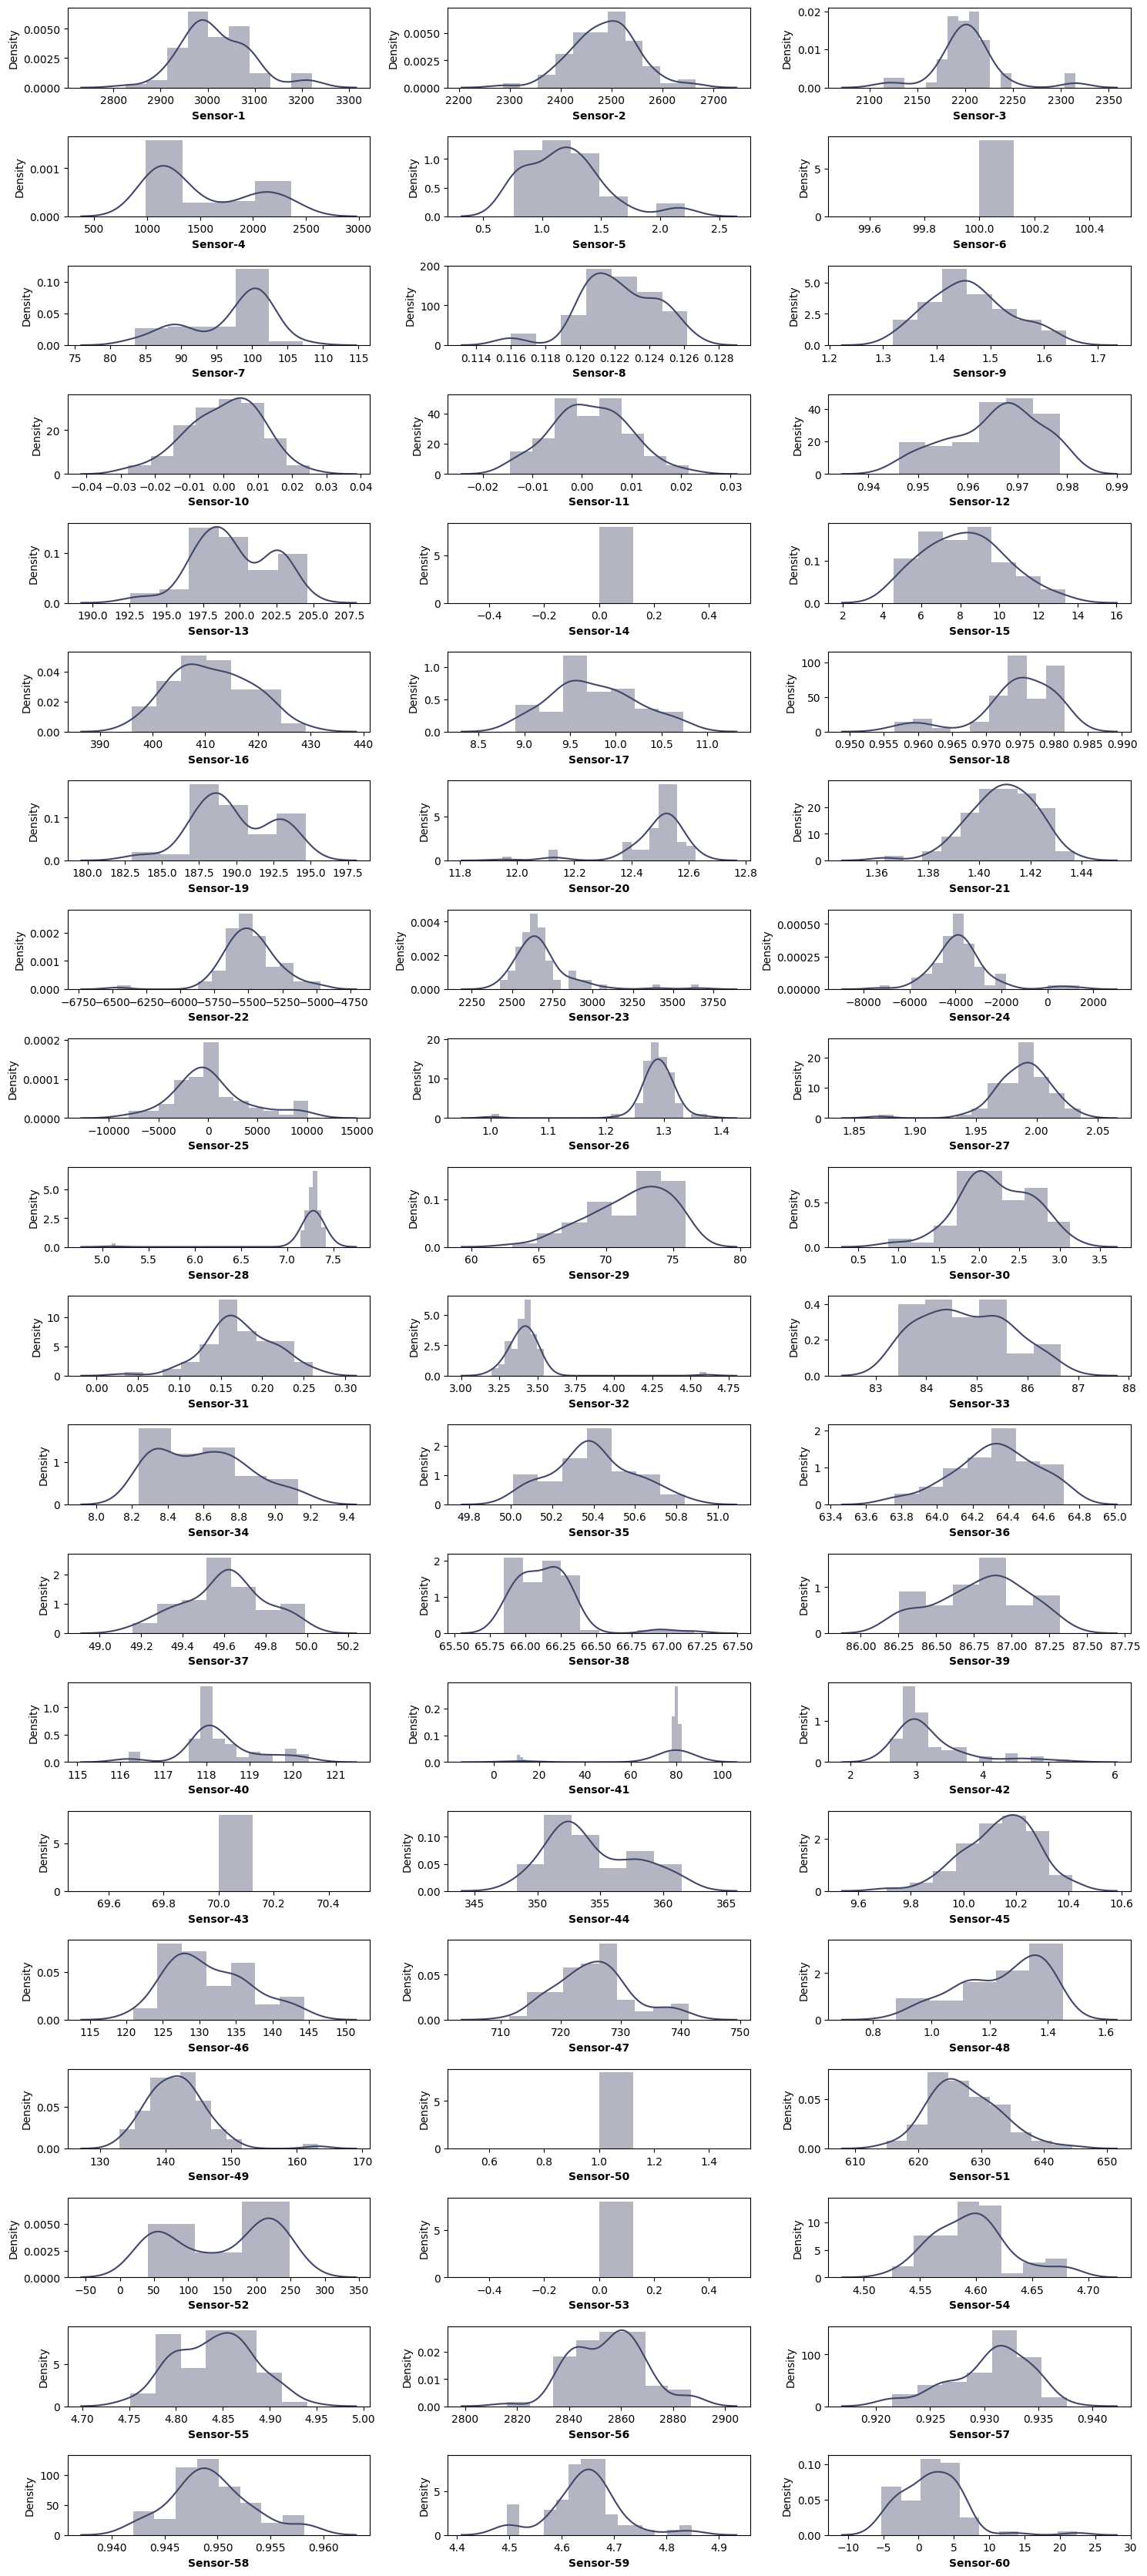

In [20]:
# lets have a look at distribution first 60 sensor 

plt.figure(figsize=(15,100))

for i,col in enumerate(df.columns[1:61]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=df[col],color='#424769')
    plt.xlabel(col, weight ='bold')
    plt.tight_layout()